In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install --upgrade scipy
!pip install --upgrade pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 14.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pycaret 3.2.0 requires scipy~=1.10.1, but you have scipy 1.11.4 which is incompatible.
  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages 

In [19]:
# Load the Iris dataset
iris_data = pd.read_csv('/content/IRIS.csv')
points=iris_data.values

In [3]:
# Display basic information about the dataset
print("Basic Information of Dataset:")
iris_data.info()

Basic Information of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Display the first few rows of the dataset
print("\nFirst Few Rows of Dataset:")
print(iris_data.head())


First Few Rows of Dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [5]:
# Descriptive statistics
print("\nDescriptive Statistics of Dataset:")
description = iris_data.describe()
print(description)


Descriptive Statistics of Dataset:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [6]:
# Visualizations
plt.figure(figsize=(15, 10))


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

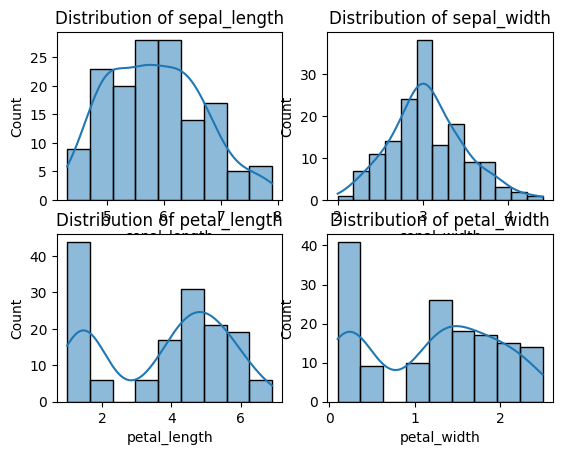

In [7]:
# Plotting distribution of features
for i, column in enumerate(iris_data.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(iris_data[column], kde=True)
    plt.title(f'Distribution of {column}')



<Figure size 640x480 with 0 Axes>

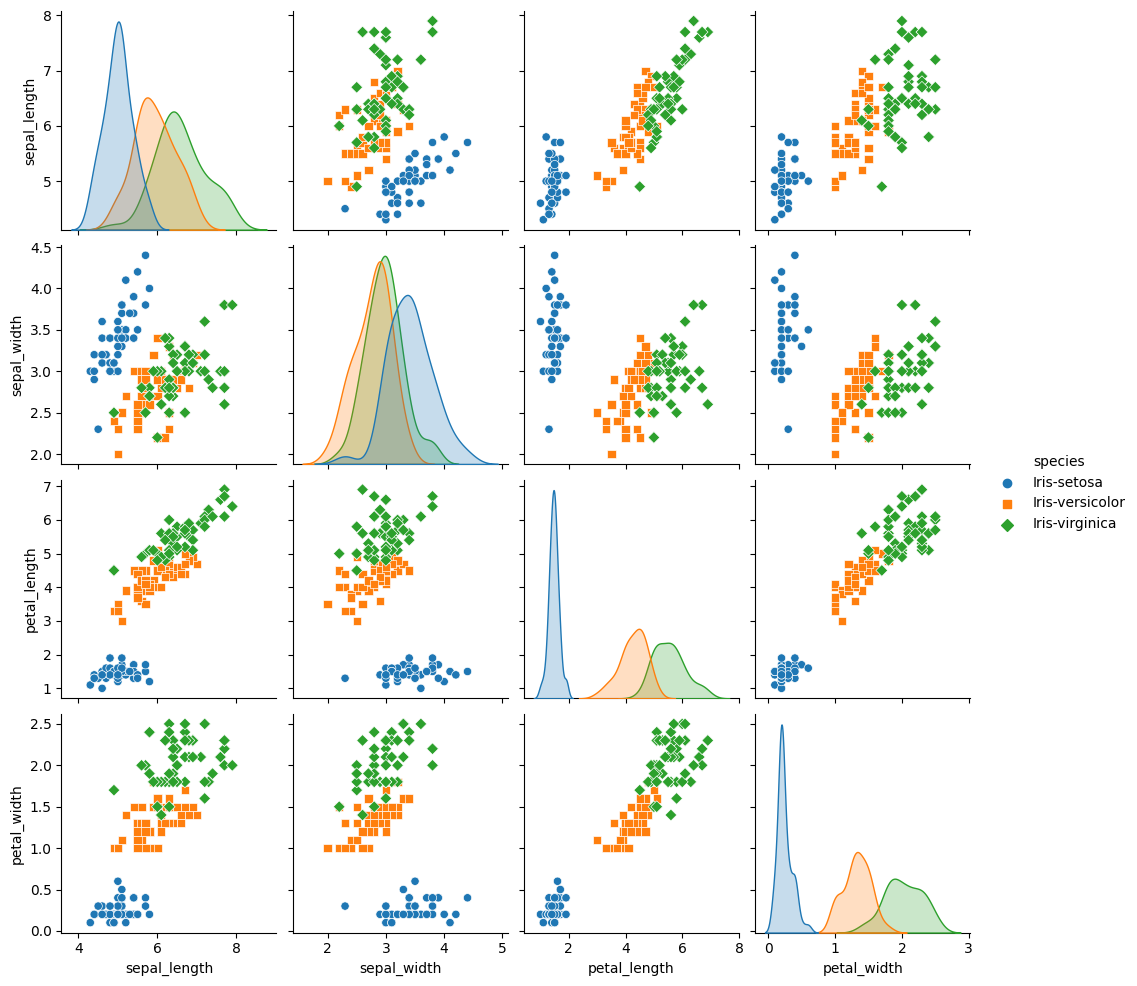

In [8]:
# Display the plots
plt.tight_layout()
plt.show()
# Pairplot to visualize relationships
sns.pairplot(iris_data, hue="species", markers=["o", "s", "D"])
plt.show()

In [13]:
!pip install scikit-learn

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Dropping the species column for unsupervised learning
iris_data.drop('species', axis=1, inplace=True)

In [16]:
# Creating and fitting the GMM model
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(points)

# Predicting the cluster labels
labels = gmm.predict(points)

# Adding the labels to the dataframe
iris_data['cluster'] = labels

# Display the first few entries of the data with cluster labels
print(iris_data.head())

   sepal_length  sepal_width  petal_length  petal_width  cluster
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


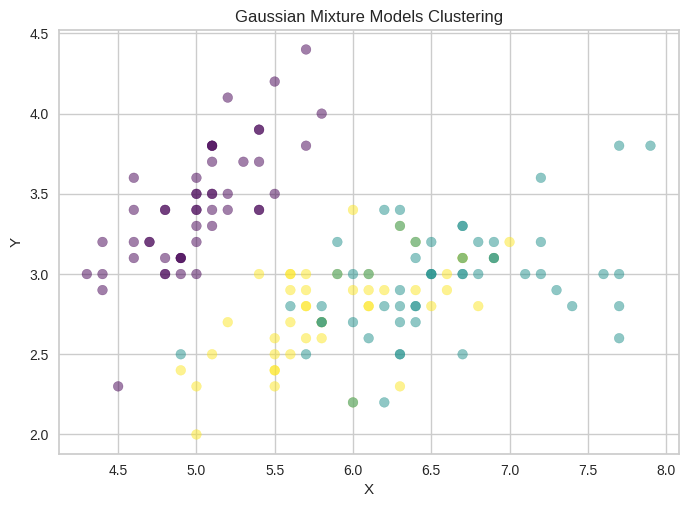

In [20]:
# Visualizing the results
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('Gaussian Mixture Models Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()